# Resolução da lista de exercícios

Aula de Fundamentos de Estatística do MBA em Data Science e Analytics da USP/ESALQ

In [1]:
import pandas as pd
import numpy as np
import math

--------------------------------------------------------------------------------------------------------------------------------

**1)** Na análise de concessão de empréstimos, uma variável potencialmente importante é a
renda da pessoa. O gerente de um banco coleta uma base de dados de seus correntistas e
extrai a variável “renda mensal (R$)” para 50 pessoas. Embora se trate de uma variável
quantitativa, deseja realizar uma análise por meio de tabela de frequências. Neste sentido,
pede-se:

a)Classifique os correntistas em faixas de renda, sendo: 0-2.000; 2.001-4.000; 4.001-
6.000; 6.001-8.000; 8.001-10.000 e 10.001-12.000.

b) Em seguida, elabore a tabela de frequências para as faixas de renda acima

In [2]:
observacoes = [i for i in range(1,51)]
print(observacoes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [3]:
renda = [2893.70,3448.38,1460.81,2223.70,2500.70,1100.25,3560.10,5510.76,2900.90,10127.50,1855.00,3160.50,8630.00,6200.73,4129.99,2735.60,4448.00,2150.20,4595.10,5560.60,2800.00,9538.33,2000.00,3225.74,1900.25,7664.72,3890.00,6589.90,1240.50,1720.20,2555.60,4730.00,4745.40,8550.00,3860.10,11320.00,6125.00,5605.75,3250.00,1500.00,9215.55,4999.20,3900.00,7000.20,3508.37,1130.00,4120.60,2600.50,2900.77,4870.60]

In [4]:
df = pd.DataFrame({'Observação': observacoes, 'Renda': renda})
df.head()

,Observação,Renda
0,1,2893.70
1,2,3448.38
2,3,1460.81
3,4,2223.70
4,5,2500.70


In [5]:
classes_renda = [0, 2000, 4000, 6000, 8000, 10000, 12000]
classes_renda

[0, 2000, 4000, 6000, 8000, 10000, 12000]

In [6]:
labels_renda = ['0-2.000', '2.001-4.000', '4.001-6.000', '6.001-8.000', '8.001-10.000', '10.001-12.000']

In [7]:
freq_renda = pd.value_counts(
                pd.cut(x = df.Renda,
                       bins = classes_renda,
                       labels = labels_renda,
                       include_lowest = True)
            )
freq_renda

2.001-4.000      19
4.001-6.000      11
0-2.000           9
6.001-8.000       5
8.001-10.000      4
10.001-12.000     2
Name: Renda, dtype: int64

In [8]:
perc_renda = pd.value_counts(
                pd.cut(x = df.Renda,
                       bins = classes_renda,
                       labels = labels_renda,
                       include_lowest = True),
                normalize = True
            )
perc_renda

2.001-4.000      0.38
4.001-6.000      0.22
0-2.000          0.18
6.001-8.000      0.10
8.001-10.000     0.08
10.001-12.000    0.04
Name: Renda, dtype: float64

In [9]:
dist_freq_quanti_personalizadas = pd.DataFrame({'frequencia': freq_renda, 'porcentagem': perc_renda})
dist_freq_quanti_personalizadas

,frequencia,porcentagem
2.001-4.000,19,0.38
4.001-6.000,11,0.22
0-2.000,9,0.18
6.001-8.000,5,0.10
8.001-10.000,4,0.08
10.001-12.000,2,0.04


--------------------------------------------------------------------------------------------------------------------------------

**2)** Um analista do mercado acionário coletou os retornos mensais de duas ações que
pretende indicar aos seus clientes. Calcule as estatísticas descritivas para as duas
variáveis, incluindo o coeficiente de correlação entre os retornos.

In [212]:
meses = [i for i in range(1, 24)]
print(meses)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [213]:
acao1 = [-0.0212,0.2438,0.2296,-0.2018,0.1296,0.0615,-0.1591,-0.1001,-0.0265,0.0776,0.0370,0.1116,-0.0667,-0.0082,0.0119,0.1205,0.0477,0.2814,-0.0674,0.0762,-0.1111,-0.0557,0.1991]
print(acao1)

[-0.0212, 0.2438, 0.2296, -0.2018, 0.1296, 0.0615, -0.1591, -0.1001, -0.0265, 0.0776, 0.037, 0.1116, -0.0667, -0.0082, 0.0119, 0.1205, 0.0477, 0.2814, -0.0674, 0.0762, -0.1111, -0.0557, 0.1991]


In [214]:
acao2 = [0.2645,0.2086,0.1248,0.0209,0.2055,0.6260,-0.1490,0.2580,0.1722,0.0199,0.4331,0.5482,0.0452,-0.1410,-0.1059,0.4074,-0.0056,0.1482,0.0753,0.0899,0.0160,0.1805,0.0334]
print(acao2)

[0.2645, 0.2086, 0.1248, 0.0209, 0.2055, 0.626, -0.149, 0.258, 0.1722, 0.0199, 0.4331, 0.5482, 0.0452, -0.141, -0.1059, 0.4074, -0.0056, 0.1482, 0.0753, 0.0899, 0.016, 0.1805, 0.0334]


In [215]:
df = pd.DataFrame({'Meses': meses, 'Ação 1': acao1, 'Ação 2': acao2})
df

,Meses,Ação 1,Ação 2
0,1,-0.0212,0.2645
1,2,0.2438,0.2086
2,3,0.2296,0.1248
3,4,-0.2018,0.0209
4,5,0.1296,0.2055
5,6,0.0615,0.6260
6,7,-0.1591,-0.1490
7,8,-0.1001,0.2580
8,9,-0.0265,0.1722
9,10,0.0776,0.0199


Uma forma de calcular algumas estatísticas descritivas das variáveis é usando o método *describe()* do pandas.

Vejamos isso:

In [216]:
df[['Ação 1', 'Ação 2']].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.27, 0.64])

,Ação 1,Ação 2
count,23.000000,23.000000
mean,0.035204,0.151135
std,0.129221,0.203822
min,-0.201800,-0.149000
25%,-0.061200,0.020400
27%,-0.056360,0.020840
50%,0.037000,0.124800
64%,0.076312,0.182500
75%,0.116050,0.233300
80%,0.125960,0.261900


Algumas medidas não aparecem no *describe()*. Calculando elas e as que já apareceram pelas fórmulas python:

**Número de observações**

In [15]:
n_observacoes_acao1 = df['Ação 1'].count()
n_observacoes_acao2 = df['Ação 2'].count()

In [16]:
print(f"Número de observações ação 1: {n_observacoes_acao1}")
print(f"Número de observações ação 2: {n_observacoes_acao2}")

Número de observações ação 1: 23
Número de observações ação 2: 23


**Média**

In [17]:
media_acao1 = df['Ação 1'].mean()
media_acao2 = df['Ação 2'].mean()

In [18]:
print(f"Média ação 1: {media_acao1}")
print(f"Média ação 2: {media_acao2}")

Média ação 1: 0.03520434782608696
Média ação 2: 0.15113478260869564


**Mediana**

In [19]:
mediana_acao1 = df['Ação 1'].median()
mediana_acao2 = df['Ação 2'].median()

In [20]:
print(f"Mediana ação 1: {mediana_acao1}")
print(f"Mediana ação 2: {mediana_acao2}")

Mediana ação 1: 0.037
Mediana ação 2: 0.1248


**Primeiro quartil**

Corresponde ao percentil 25

In [21]:
quartil1_acao1 = df['Ação 1'].quantile([0.25])
quartil1_acao2 = df['Ação 2'].quantile([0.25])

In [22]:
print(f"Primeiro quartil ação 1: {quartil1_acao1}")
print('\n')
print(f"Primeiro quartil ação 2: {quartil1_acao2}")

Primeiro quartil ação 1: 0.25   -0.0612
Name: Ação 1, dtype: float64


Primeiro quartil ação 2: 0.25    0.0204
Name: Ação 2, dtype: float64


**Terceiro quartil**

Corresponde ao percentil 75

In [23]:
quartil3_acao1 = df['Ação 1'].quantile([0.75])
quartil3_acao2 = df['Ação 2'].quantile([0.75])

In [24]:
print(f"Terceiro quartil ação 1: {quartil3_acao1}")
print('\n')
print(f"Terceiro quartil ação 2: {quartil3_acao2}")

Terceiro quartil ação 1: 0.75    0.11605
Name: Ação 1, dtype: float64


Terceiro quartil ação 2: 0.75    0.2333
Name: Ação 2, dtype: float64


**Oitavo decil**

Corresponde ao percentil 80

In [25]:
decil8_acao1 = df['Ação 1'].quantile([0.8])
decil8_acao2 = df['Ação 2'].quantile([0.8])

In [26]:
print(f"Oitavo decil ação 1: {decil8_acao1}")
print('\n')
print(f"Oitavo decil ação 2: {decil8_acao2}")

Oitavo decil ação 1: 0.8    0.12596
Name: Ação 1, dtype: float64


Oitavo decil ação 2: 0.8    0.2619
Name: Ação 2, dtype: float64


**Nono decil**

Corresponde ao percentil 90

In [27]:
decil9_acao1 = df['Ação 1'].quantile([0.9])
decil9_acao2 = df['Ação 2'].quantile([0.9])

In [28]:
print(f"Nono decil ação 1: {decil9_acao1}")
print('\n')
print(f"Nono decil ação 2: {decil9_acao2}")

Nono decil ação 1: 0.9    0.2235
Name: Ação 1, dtype: float64


Nono decil ação 2: 0.9    0.42796
Name: Ação 2, dtype: float64


**27º percentil**

In [29]:
percentil27_acao1 = df['Ação 1'].quantile([0.27])
percentil27_acao2 = df['Ação 2'].quantile([0.27])

In [30]:
print(f"27º percentil ação 1: {percentil27_acao1}")
print('\n')
print(f"27º percentil ação 2: {percentil27_acao2}")

27º percentil ação 1: 0.27   -0.05636
Name: Ação 1, dtype: float64


27º percentil ação 2: 0.27    0.02084
Name: Ação 2, dtype: float64


**64º percentil**

In [31]:
percentil64_acao1 = df['Ação 1'].quantile([0.64])
percentil64_acao2 = df['Ação 2'].quantile([0.64])

In [32]:
print(f"64º percentil ação 1: {percentil64_acao1}")
print('\n')
print(f"64º percentil ação 2: {percentil64_acao2}")

64º percentil ação 1: 0.64    0.076312
Name: Ação 1, dtype: float64


64º percentil ação 2: 0.64    0.1825
Name: Ação 2, dtype: float64


**Valor mínimo**

In [33]:
minimo_acao1 = df['Ação 1'].min()
minimo_acao2 = df['Ação 2'].min()

In [34]:
print(f"Valor mínimo ação 1: {minimo_acao1}")
print(f"Valor mínimo ação 2: {minimo_acao2}")

Valor mínimo ação 1: -0.2018
Valor mínimo ação 2: -0.149


**Valor máximo**

In [35]:
maximo_acao1 = df['Ação 1'].max()
maximo_acao2 = df['Ação 2'].max()

In [36]:
print(f"Valor máximo ação 1: {maximo_acao1}")
print(f"Valor máximo ação 2: {maximo_acao2}")

Valor máximo ação 1: 0.2814
Valor máximo ação 2: 0.626


**Amplitude**

In [37]:
print(f"Amplitude ação 1: {maximo_acao1 - minimo_acao1}")
print(f"Amplitude ação 2: {maximo_acao2 - minimo_acao2}")

Amplitude ação 1: 0.48319999999999996
Amplitude ação 2: 0.775


**Variância**

In [38]:
print(f"Variância ação 1: {df['Ação 1'].var()}")
print(f"Variância ação 2: {df['Ação 2'].var()}")

Variância ação 1: 0.016698003162055334
Variância ação 2: 0.041543523280632405


**Desvio padrão**

In [39]:
desvio_padrao_acao1 = math.sqrt(df['Ação 1'].var())
desvio_padrao_acao2 = math.sqrt(df['Ação 2'].var())

In [40]:
print(f"Desvio padrão ação 1: {desvio_padrao_acao1}")
print(f"Desvio padrão ação 2: {desvio_padrao_acao2}")

Desvio padrão ação 1: 0.12922075360426952
Desvio padrão ação 2: 0.20382228357231308


**Erro padrão**

In [41]:
erro_padrao_acao1 = desvio_padrao_acao1/math.sqrt(n_observacoes_acao1)
erro_padrao_acao2 = desvio_padrao_acao2/math.sqrt(n_observacoes_acao2)

In [42]:
print(f"Erro padrão ação 1: {erro_padrao_acao1}")
print(f"Erro padrão ação 2: {erro_padrao_acao2}")

Erro padrão ação 1: 0.026944389721807894
Erro padrão ação 2: 0.0424998840308558


**Coeficiente de variação**

In [43]:
coeficiente_variacao_acao1 = desvio_padrao_acao1/media_acao1
coeficiente_variacao_acao2 = desvio_padrao_acao2/media_acao2

In [44]:
print(f"Coeficiente de variação ação 1: {coeficiente_variacao_acao1*100} %")
print(f"Coeficiente de variação ação 2: {coeficiente_variacao_acao2*100} %")

Coeficiente de variação ação 1: 367.0590753239717 %
Coeficiente de variação ação 2: 134.8612675746728 %


**Assimetria**

In [217]:
assimetria_acao1 = df['Ação 1'].skew()
assimetria_acao2 = df['Ação 2'].skew()

In [218]:
print(f"Assimetria ação 1: {assimetria_acao1}")
print(f"Assimetria ação 2: {assimetria_acao2}")

Assimetria ação 1: 0.18837741504861455
Assimetria ação 2: 0.7569699320129853


**Curtose**

In [219]:
curtose_acao1 = df['Ação 1'].kurtosis()
curtose_acao2 = df['Ação 2'].kurtosis()

In [220]:
print(f"Curtose ação 1: {curtose_acao1}")
print(f"Curtose ação 2: {curtose_acao2}")

Curtose ação 1: -0.5477196357246568
Curtose ação 2: 0.291816519420963


<Axes: >

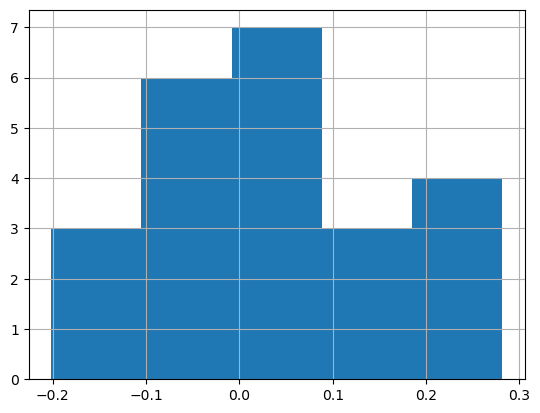

In [225]:
df['Ação 1'].hist(bins=5)

<Axes: >

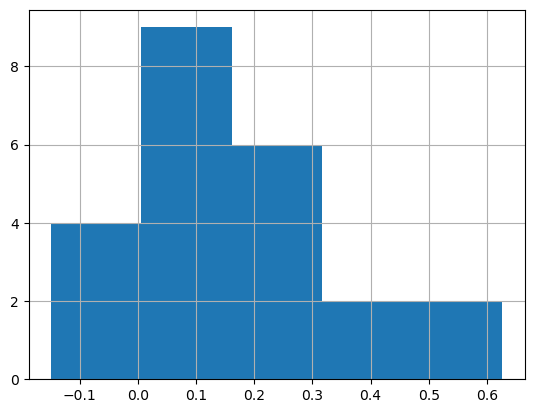

In [224]:
df['Ação 2'].hist(bins=5)

**Coeficiente de correlação**

In [45]:
df[['Ação 1', 'Ação 2']].corr()

,Ação 1,Ação 2
Ação 1,1.000000,0.290819
Ação 2,0.290819,1.000000


--------------------------------------------------------------------------------------------------------------------------------

**3)** Em certo jogo, probabilidade de vitória (sucesso) a cada nova jogada é 1/6. Se forem
feitas 10 jogadas, quais são as seguintes probabilidades:

a) Ter vitória em 4 jogadas.

b) Ter vitória em pelo menos 7 jogadas.

Observe que estamos com um problema de distribuição binomial.

A distribuição **binomial** ocorre quando há (n) repetições independentes do 
experimento de **Bernoulli**.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral (todas as possibilidades do experimento), sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de **sucesso** e **fracasso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso

**Experimento binomial**

1. Realização de $n$ ensaios idênticos.

2. Os ensaios são independentes.

3. Somente dois resultados são possíveis, exemplo: Verdadeiro ou falso; Cara ou coroa; Sucesso ou fracasso.

4. A probabilidade de sucesso é representada por $p$ e a de fracasso por $1-p=q$. Estas probabilidades não se modificam de ensaio para ensaio.


**Média da distribuição binomial**

O valor esperado ou a média da distribuição binomial é igual ao número de experimentos realizados multiplicado pela chance de ocorrência do evento.

# $$\mu = n \times p$$


**Desvio padrão da distribuição binomial**

O desvio padrão é o produto entre o número de experimentos, a probabilidade de sucesso e a probabilidade de fracasso.

# $$\sigma = \sqrt{n \times p \times q}$$


**Combinações**

Número de combinações de $n$ objetos, tomados $k$ a cada vez, é:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Onde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definição

## $$0! = 1$$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

**Resolvendo o problema 3**

In [46]:
from scipy.special import comb
from scipy.stats import binom, nbinom

In [47]:
p = 1/6
p

0.16666666666666666

In [48]:
n = 10
n

10

**a)** Ter vitória em 4 jogadas

In [49]:
k = 4
k

4

Solução "manual"

In [50]:
prob_3a = (comb(n, k) * (p**k) * ((1-p)**(n-k))) * 100
prob_3a

5.426587585098817

Solução com funções python

In [51]:
prob_3a = binom.pmf(k, n, p) * 100
prob_3a

5.42658758509882

**b)** Ter vitória em pelo menos 7 jogadas.

Ter vitória em pelo menos 7 jogadas significa ter vitória em no mínimo 7 jogadas. Como o número de jogadas é 10, então a probabilidade de termos vitória em pelo menos 7 jogadas é ter vitória em 7 jogadas ou 8 jogadas ou 9 jogadas ou 10 jogadas.

Como em probabilidade e estatística o ou é o mesmo que +,

$$P(vitória >= 7) = P(k = 7) + P(k = 8) + P(k = 9) + P(k = 10)$$

Solução "manual"

In [52]:
prob_3b = ((comb(n, 7) * (p**7) * ((1-p)**(n-7))) + 
           (comb(n, 8) * (p**8) * ((1-p)**(n-8))) + 
           (comb(n, 9) * (p**9) * ((1-p)**(n-9))) +
           (comb(n, 10) * (p**10) * ((1-p)**(n-10)))) * 100
prob_3b

0.026752146522379713

Solução com funções python

    Solução 1
    
    Usando a função binom.pmf da scipy e somando os resultados

In [53]:
prob_3b = (binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)) * 100
prob_3b

0.02675214652237972

ou

In [54]:
prob_3b = binom.pmf([7, 8, 9, 10], n, p).sum() * 100
prob_3b

0.02675214652237972

    Solução 2
    
    Usando a função binom.cdf da scipy. A cdf é a função cumulativa até aquele ponto. Logo, aqui, como queremos a região >= 7, precisamos fazer 1-binom.cdf até 6, pois não queremos a área que está abaixo de 7, ou seja <6

In [55]:
prob_3b = (1 - binom.cdf(6, n, p)) * 100
prob_3b

0.02675214652237967

--------------------------------------------------------------------------------------------------------------------------------

**4)** (Fonte: Fávero e Belfiore, 2017, Cap. 5) Suponha que um aluno acerte três questões a
cada cinco testes. Seja X o número de tentativas até o décimo segundo acerto. Determine
a probabilidade de que o aluno precise fazer 20 questões para acertar 12.

Estamos frente a um problema de distribuição de probabilidade binomial negativa.

Na distribuição **binomial negativa**, são realizados x ensaios independentes de **Bernoulli** até que sejam obtidos k sucessos.

A probabilidade de sucesso p é constante em todos os ensaios realizados.

A  variável no modelo binomial negativa indica a quantidade de ensaios x.

# $$P(x)=\binom{x-1}{k-1} p^k q^{x-k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$x$ = número de ensaios

$k$ = número de eventos desejados que tenham sucesso


**Combinações**

Número de combinações de $x-1$, tomados $k-1$ a cada vez, é:

# $$C_{x-1}^{k-1} = \binom{x-1}{k-1} = \frac{(x-1)!}{(k-1)![(x-1)-(k-1)]!}$$


**Média da distribuição binomial negativa**

# $$\frac{k}{p}$$


**Desvio padrão da distribuição binomial negativa**

# $$\sigma = \sqrt{\frac{k(1-p)}{p^2}}$$


**Relação entre a distribuição binomial negativa e a binomial**

A distribuição binomial negativa está relacionada com a distribuição binomial. Na binomial, devemos fixar o tamanho da amostra (número de ensaios de Bernoulli) e observar o número de sucessos (variável aleatória). Na binomial negativa, devemos fixar o número de sucessos (k) e observar o número de ensaios Bernoulli necessários para obter k sucessos.

**Resolvendo o problema 4**

In [56]:
p = 3/5
p

0.6

In [57]:
x = 20
x

20

In [58]:
k = 12
k

12

Solução "manual"

In [59]:
prob_4 = comb(x-1,k-1) * (p**k) * ((1-p)**(x-k)) * 100
prob_4

10.782347265281361

--------------------------------------------------------------------------------------------------------------------------------

**5)** (Fonte: Fávero e Belfiore, 2017, Cap. 5) Suponha que, em determinado hospital, 3
clientes são operados diariamente de cirurgia do estômago, seguindo uma distribuição
Poisson. Calcule a probabilidade de que 28 clientes sejam operados na próxima semana
(7 dias úteis).

Estamos frente a um problema de distribuição de Poisson.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

É empregada para descrever o número de ocorrências em um intervalo de tempo ou espaço específico. Os eventos são caracterizados pela possibilidade de contagem dos sucessos, mas não a possibilidade de contagem dos fracassos.

Como exemplos de processos onde podemos aplicar a distribuição de Poisson temos a determinação do número de clientes que entram em uma loja em determinada hora, o número de carros que chegam em um drive-thru de uma lanchonete na hora do almoço, a determinação do número de acidentes registrados em um trecho de estrada etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$k$ = número de sucessos no intervalo desejado

**Experimento Poisson**

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.

2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.

3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.


**Média da distribuição Poisson**

# $$\mu$$


**Desvio padrão da distribuição Poisson**

# $$\sigma = \sqrt{\mu}$$

**Resolvendo o problema 5** 

In [60]:
mu = 3
mu

3

In [61]:
# quero 28 pacientes na próxima semana, mas a minha média de ocorrências está em dias. Logo, como 1 semana tem 7 dias, 
# transformo o k para uma medida por dia

k = int(28/7)
k

4

Solução "manual"

In [62]:
prob_5 = (((np.e)**(-mu)) * (mu)**k)/math.factorial(k)
prob_5 = prob_5 * 100
prob_5

16.803135574154084

Solução com funções python

In [63]:
from scipy.stats import poisson

In [64]:
prob_5 = poisson.pmf(k, mu) * 100
prob_5

16.803135574154084

In [65]:
prob_5

16.803135574154084

--------------------------------------------------------------------------------------------------------------------------------

**6)** Nos últimos meses, foram feitas medições do tempo decorrido entre o início e
finalização de uma das etapas do processo de produção de certo produto. O tempo médio
foi calculado em 26,5 minutos e o desvio padrão foi de 4,0 minutos. Sabendo que tal
variável segue uma distribuição normal, identifique as seguintes informações:

a) P(X>37)

b) P(X<20)

c) P(22<X<28)

Estamos frente a um problema cuja variável segue uma distribuição normal.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

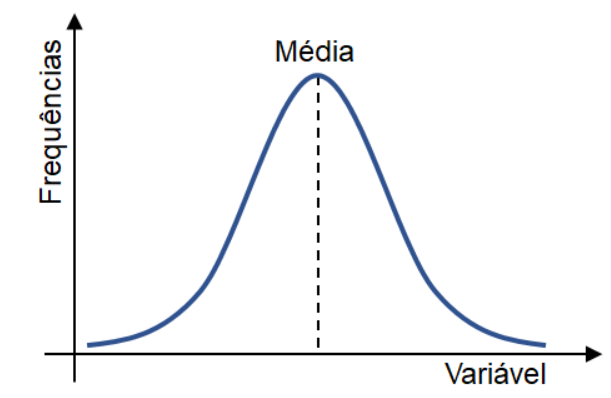


**Características importantes**

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.


Densidade de probabilidade:

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

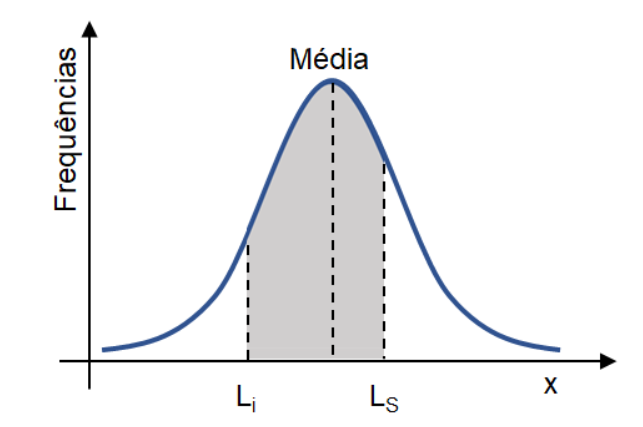

Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior

$L_s$ = limite superior


**Tabelas padronizadas**

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

In [66]:
from scipy.stats import norm

**Construindo tabela normal padronizada**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [67]:
tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)]
)

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


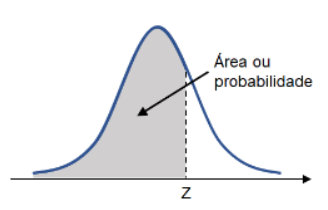

A tabela acima fornece a área sob a curva entre $-\infty$ e $Z$ desvios padrão acima da média. Lembrando que por se tratar de valores padronizados temos $\mu = 0$.

**Resolvendo o problema 6**

In [68]:
media = 26.5
media

26.5

In [69]:
desvio_padrao = 4
desvio_padrao

4

**a)** P(X > 37)

Obtendo a variável padronizada Z

In [70]:
Z_a = (37 - media)/desvio_padrao
Z_a

2.625

Portanto, P(X > 37) = P(Z > 2.625) = 1 - P(Z < 2.625)

Tanto a tabela quanto as fórmulas, nos dão a probabilidade como sendo a área abaixo do gráfico até o valor de Z. Observe que aqui queremos a área do gráfico após o valor de Z (Z > 2.635).

Então, usando tanto a tabela quanto a fórmula, precisamos tirar do total (1 ou 100%) a área abaixo de Z.

Solução usando a tabela

In [71]:
prob_6a = 1 - 0.9957
prob_6a

0.0042999999999999705

Solução usando fórmulas Python

Aqui precisamos usar a cumulativa

In [72]:
prob_6a = 1 - norm.cdf(Z_a)
prob_6a

0.004332448363012609

**b)** P(X < 20)

Obtendo a variável padronizada Z

In [73]:
Z_b = (20 - media)/desvio_padrao
Z_b

-1.625

Portanto, P(X < 20) = P(Z < -1.625)

Solução pela tabela

P(Z < -1.625) = P(Z > 1.625) = 1 - P(Z < 1.625)

In [74]:
prob_6b = 1 - 0.9484
prob_6b

0.05159999999999998

Solução usando fórmulas python

In [75]:
prob_6b = norm.cdf(Z_b)
prob_6b

0.05208127941521953

**c)** P(22<X<28)

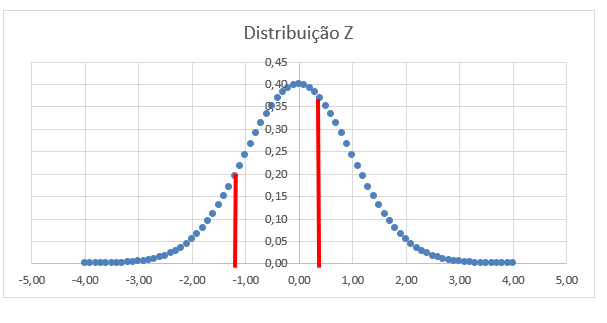

Queremos a área entre esses dois limites em vermelho. Que nada mais é que P(X<28) - P(X-22)

Obtendo as variáveis padronizadas Zs

In [76]:
Z_c1 = (22 - media)/desvio_padrao
Z_c1

-1.125

In [77]:
Z_c2 = (28 - media)/desvio_padrao
Z_c2

0.375

Portanto, P(22<X<28) = P(-1.125<Z<0.375)

Solução usando a tabela

In [78]:
# P(Z < 0.375)

prob_6c2 = 0.6480
prob_6c2

0.648

In [79]:
# P(Z < -1.125) = P(Z > 1.125) = 1 - P(Z < 1.125)

prob_6c1 = 1 - 0.8708
prob_6c1

0.12919999999999998

In [80]:
prob_6c = prob_6c2 - prob_6c1
prob_6c

0.5188

Usando fórmulas python

In [81]:
prob_6c = norm.cdf(Z_c2) - norm.cdf(Z_c1)
prob_6c

0.5158752495359149

-------------------------------------------------------------------------------------------------------------------------------

**7)** (Fonte: Fávero e Belfiore, 2017, Cap. 8) Um grupo de 60 leitores fez uma avaliação de
três livros de romance e, ao final, escolheram uma das três opções. Teste a hipótese nula
de que não há diferença na preferência dos leitores, ao nível de significância de 5%.

Estamos frente a um teste qui-quadrado de uma amostra

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2

In [82]:
df  = pd.DataFrame({'Eventos': ['Frequência', 'Proporção'], 
                    'Livro A': [29, 0.483], 
                    'Livro B': [15, 0.250],
                    'Livro C': [16, 0.267],
                    'Total': [60, 1]})

In [83]:
df

,Eventos,Livro A,Livro B,Livro C,Total
0,Frequência,29.000,15.00,16.000,60
1,Proporção,0.483,0.25,0.267,1


Nível de significância de 5%, ou seja,

In [84]:
alpha = 0.05
alpha

0.05

In [85]:
n = 60
n

60

Precisamos testar:

H0: não há diferença na preferência dos leitores (as frequências observadas e esperadas são iguais)

H1: há diferença na preferência dos leitores (as frequências observadas e esperadas são diferentes)

In [86]:
df_qui = pd.DataFrame({'Livro': ['Livro A', 'Livro B', 'Livro C'],
                       'Freq Observada': [29, 15, 16],
                       'Freq Esperada': [int(60/3), int(60/3), int(60/3)]})
df_qui

,Livro,Freq Observada,Freq Esperada
0,Livro A,29,20
1,Livro B,15,20
2,Livro C,16,20


In [87]:
df_qui['Estatistica Qui'] = df_qui.apply(lambda x: ((x['Freq Observada'] - x['Freq Esperada'])**2)/x['Freq Esperada'], axis=1)
df_qui

,Livro,Freq Observada,Freq Esperada,Estatistica Qui
0,Livro A,29,20,4.05
1,Livro B,15,20,1.25
2,Livro C,16,20,0.80


**Fazendo manualmente**

In [88]:
estatistica_teste_qui = df_qui['Estatistica Qui'].sum()
estatistica_teste_qui

6.1

In [89]:
from scipy.stats import chi2

Calculando o p-valor que nada mais é do que a probabilidade associada a estatística de teste calculada. Levando em conta k-1 graus de liberdade, que aqui é 3-1=2

In [90]:
# fazemos 1 menos, pois mesmo sendo um teste bicaudal, na qui² pegamos a cauda à direita, pois quanto mais diferente
# mais à direita ficará, dado que a distribuição qui² é assimétrica à direita
p_valor = 1 - chi2.cdf(estatistica_teste_qui, 2) #onde 3-1 são os graus de liberdade
p_valor

0.04735892439114098

Poderíamos usar, ao invés do cdf, a sf

In [91]:
chi2.sf(estatistica_teste_qui, 2)

0.04735892439114093

Calculando o valor crítico da distribuição Qui² para um nível de significância de 5%.

Dado que temos a área de 5%, qual o valor crítico? Precisamos usar a inversa

In [92]:
valor_critico_dist_qui = chi2.isf(alpha, 2)
valor_critico_dist_qui

5.991464547107983

**Conclusão:** como estatistica_teste_qui > valor_critico_dist_qui, a estatistica_teste_qui está na região de rejeição. Logo, rejeitamos a hipótese nula. Ou seja, as preferências dos leitores são estatísticamente diferentes.

Outra forma de concluirmos isso é usando o p-valor e o nível de significância.
Como p-valor < alpha, logo rejeitamos a hipótese nula.

-------------------------------------------------------------------------------------------------------------------------------

**8)** Foram coletados dados sobre a quantidade de chuva por dia (em milímetros), durante
14 dias, para dois locais distintos. O pesquisador notou que o local A aparenta ter maior
variabilidade na quantidade de chuva, comparativamente ao local B. Neste sentido, deseja
testar a hipótese de que a variabilidade na quantidade de chuva é significativamente maior
em A do que em B. Realize o teste F para testar tal hipótese.

Estamos frente a um teste F para comparação de variâncias.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html#scipy.stats.f

Precisamos testar:

H0: a variabilidade na quantidade de chuva é igual para o local A e para o local B

H1: a variabilidade na quantidade de chuva é significativamente maior em A do que em B

In [93]:
local_a = [8.90,7.70,8.60,3.90,7.60,10.20,9.60,8.90,9.60,5.50,0.50,1.50,1.50,4.00]
local_b = [5.60,4.90,6.60,5.90,6.50,5.90,3.60,5.60,8.80,7.80,9.90,11.00,8.30,5.50]

In [94]:
df = pd.DataFrame({'Local A mm': local_a, 'Local B mm': local_b})
df

,Local A mm,Local B mm
0,8.9,5.6
1,7.7,4.9
2,8.6,6.6
3,3.9,5.9
4,7.6,6.5
5,10.2,5.9
6,9.6,3.6
7,8.9,5.6
8,9.6,8.8
9,5.5,7.8


**Fazendo manualmente**

In [95]:
variancia_local_a = df['Local A mm'].var()
variancia_local_a

11.604395604395604

In [96]:
variancia_local_b = df['Local B mm'].var()
variancia_local_b

4.202692307692308

Estatística do teste

# $$F = \frac{S_1^2}{S_2^2}$$

onde S1 é a maior variância e S2 é a menor variância

Portanto,

In [97]:
estatistica_teste_f = variancia_local_a/variancia_local_b
estatistica_teste_f

2.7611813463373815

In [98]:
from scipy.stats import f

In [99]:
n_numerador = df['Local A mm'].count()
n_numerador

14

In [100]:
n_denominador = df['Local B mm'].count()
n_denominador

14

Calculando o p-valor que nada mais é do que a probabilidade associada a estatística de teste calculada. Levando em conta n-1 graus de liberdade no numerador e n-1 graus de liberdade no denominador

In [101]:
# fazemos 1 menos, pois mesmo sendo um teste bicaudal, na f pegamos a cauda à direita, pois quanto mais diferente
# mais à direita ficará, dado que a distribuição f é assimétrica à direita

p_valor = 1 - f.cdf(estatistica_teste_f, n_numerador-1, n_denominador-1)
p_valor

0.03917205449902483

Podemos usar, ao invés da cdf, a sf

In [102]:
f.sf(estatistica_teste_f, n_numerador-1, n_denominador-1)

0.03917205449902489

Calculando o valor crítico da distribuição F para um nível de significância de 5%.

Dado que temos a área de 5%, qual o valor crítico? Precisamos usar a inversa

In [103]:
alpha5 = 0.05
alpha5

0.05

In [104]:
valor_critico_dist_f_5 = f.isf(alpha5, n_numerador-1, n_denominador-1)
valor_critico_dist_f_5

2.576927084472978

Calculando o valor crítico da distribuição F para um nível de significância de 10%.

Dado que temos a área de 10%, qual o valor crítico? Precisamos usar a inversa

In [105]:
alpha10 = 0.1
alpha10

0.1

In [106]:
valor_critico_dist_f_10 = f.isf(alpha10, n_numerador-1, n_denominador-1)
valor_critico_dist_f_10

2.080185087654393

Calculando o valor crítico da distribuição F para um nível de significância de 1%.

Dado que temos a área de 1%, qual o valor crítico? Precisamos usar a inversa

In [107]:
alpha1 = 0.01
alpha1

0.01

In [108]:
valor_critico_dist_f_1 = f.isf(alpha1, n_numerador-1, n_denominador-1)
valor_critico_dist_f_1

3.9052043579347204

**Conclusão:** Para os níveis de significância 5% e 10%, rejeitamos H0, pois estatística de teste é maior que o valor crítico para esses níveis de significância. Além disso, p_valor da estatística de teste é menor que esses níveis de significância. Ou seja, para os níveis de significância 5% e 10%, a variabilidade na quantidade de chuva é estatisticamente maior em A do que em B.

Por outro lado, para o nível de significância de 1%, não rejeitamos H0, pois a estatístca de teste é menor que o valor crítico para esse nível de significância. Além disso, p_valor da estatística de teste é maior que 1%.

-------------------------------------------------------------------------------------------------------------------------------

**9)** (Fonte: Fávero e Belfiore, 2017, Cap. 7) Deseja-se comparar o tempo médio de espera
para atendimento (min) em 2 hospitais. Para isso, coletou-se uma amostra com 20
pacientes em cada hospital. Verifique se há diferenças entre os tempos médios de espera
nos dois hospitais. Considere α = 1%.
Adicionalmente, calcule os intervalos de confiança para o tempo médio de espera nos 
dois hospitais.

Estamos frente a um teste t para comparação de médias para duas amostras independentes

Queremos testar:

H0: não há diferença entre os tempos médios de espera

H1: há diferença entre os tempos médios de espera

Logo, é um teste bicaudal

In [109]:
df = pd.DataFrame({'Hospital 1': [72, 58, 91, 88, 70, 76, 98, 101, 65, 73, 79, 82, 80, 91, 93, 88, 97, 83, 71, 74],
                   'Hospital 2': [66, 40, 55, 70, 76, 61, 53, 50, 47, 61, 52, 48, 60, 72, 57, 70, 66, 55, 46, 51]})
df

,Hospital 1,Hospital 2
0,72,66
1,58,40
2,91,55
3,88,70
4,70,76
5,76,61
6,98,53
7,101,50
8,65,47
9,73,61


Para comparar as médias de duas amostras independentes de uma mesma população por meio do teste t, antes é necessário comparar as variâncias populacionais dos dois grupos, ou seja, fazemos um teste F para comparação das variâncias.

Isso é necessário, pois o cálculo da estatística t e graus de liberdade para esse caso dependem se as variâncias populacionais são estatisticamente diferentes ou se são estatisticamente homogêneas.

H0: as variâncias são estatisticamente homogêneas

H1: as variâncias são estatisticamente diferentes

Portanto, fazendo o teste F para comparação das variâncias primeiro

**Fazendo manualmente**

In [110]:
variancia_hospital_1 = df['Hospital 1'].var()
variancia_hospital_1

137.73684210526315

In [111]:
variancia_hospital_2 = df['Hospital 2'].var()
variancia_hospital_2

96.8

In [112]:
estatistica_teste_f = variancia_hospital_1/variancia_hospital_2
estatistica_teste_f

1.4229012614180079

Calculando o p-valor que nada mais é do que a probabilidade associada a estatística de teste calculada. Levando em conta n-1 graus de liberdade no numerador e n-1 graus de liberdade no denominador

In [113]:
n_numerador = df['Hospital 1'].count()
n_numerador

20

In [114]:
n_denominador = df['Hospital 2'].count()
n_denominador

20

In [115]:
p_valor = 1 - f.cdf(estatistica_teste_f, n_numerador-1, n_denominador-1)
p_valor

0.22460949688391607

Poderíamos usar, ao invés da cdf, a sf

In [116]:
f.sf(estatistica_teste_f, n_numerador-1, n_denominador-1)

0.2246094968839159

Calculando o valor crítico da distribuição F para um nível de significância de 1%.

Dado que temos a área de 1%, qual o valor crítico? Precisamos usar a inversa

In [117]:
alpha = 0.01
alpha

0.01

In [118]:
valor_critico_dist_f = f.isf(alpha, n_numerador-1, n_denominador-1)
valor_critico_dist_f

3.027357882541575

**Conclusão:** Para um nível de significância de 1%, não rejeitamos a hipótese nula. Pois, estatística de teste é menor que o valor crítico e, além disso, podemos ver que o p-valor é maior que o alpha. Logo, a estatística de teste está na região de não rejeição. Portanto, de fato, não rejeitamos a hipótese nula. Ou seja, concluímos que as variâncias são estatísticamente homogêneas.

Portanto, dado que as variâncias são estatisticamente homogêneas, a estatística t para comparação de médias em duas amostras independentes vem da fórmula:

# $$T = \frac{X_1-X_2}{S_p\sqrt{{\frac{1}{n_1}}+{\frac{1}{n_2}}}}$$

Em que, 

# $$S_p = \sqrt{{\frac{(n_1-1)S_1^2+(n_2-1)S_2^2}{n_1+n_2-2}}}$$

e os graus de liberdade são
# $$n_1+n_2-2$$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t

Calculando a estatística t

In [119]:
x1 = df['Hospital 1'].mean()
x1

81.5

In [120]:
x2 = df['Hospital 2'].mean()
x2

57.8

In [121]:
sp_numerador = (n_numerador-1)*(variancia_hospital_1**2) + (n_denominador-1)*(variancia_hospital_2**2)
sp_numerador

538491.8757894736

In [122]:
sp = math.sqrt((((n_numerador-1)*(variancia_hospital_1)) + ((n_denominador-1)*(variancia_hospital_2)))/(n_numerador + n_denominador -2))
sp

10.829054485624845

In [123]:
estatistica_teste_t_medias = (x1 - x2)/(sp*math.sqrt((1/n_numerador)+(1/n_denominador)))
estatistica_teste_t_medias

6.92082403366596

Calculando o p-valor que nada mais é do que a probabilidade associada a estatística de teste calculada. Levando em conta n + n - 2 graus de liberadade

Como é um teste bicaudal, essa probabilidade deve ser dobrada

In [124]:
from scipy.stats import t

In [125]:
p_valor = (1 - t.cdf(estatistica_teste_t_medias, n_numerador+n_denominador-2))*2
p_valor

3.147827642990819e-08

Calculando o valor crítico da distribuição t para um nível de significância 1%

In [126]:
# Como é um teste bicaudal, fica alpha/2 de um lado e alpha/2 de outro

valor_critico_t_medias = t.isf(0.005, n_numerador+n_denominador-2)
valor_critico_t_medias

2.7115576019130625

**Conclusão**: ao nível de significância de 1%, rejeitamos H0. Note que estatística de teste é maior que o valor crítico e, além disso, também, o p valor é menor que 1%. Portanto, podemos concluir que os tempos médios de espera são estatísticamente diferentes nos dois hospitais.

**Calculando o intervalo de confiança**

Calculando o valor crítico para um nível de significância de 1%, usando a t de Student, com n-1 graus de liberdade.

Lembrando que precisamos usar os valores bicaudais

In [127]:
valor_critico_t = t.isf(0.01/2, 20-1)
valor_critico_t

2.860934606449914

Hospital 1

In [128]:
desvio_padrao_hospital_1 = math.sqrt(variancia_hospital_1)
desvio_padrao_hospital_1

11.736134035757395

In [129]:
limite_inf_hospital_1 = x1 - valor_critico_t*(desvio_padrao_hospital_1/(math.sqrt(n_numerador)))
limite_sup_hospital_1 = x1 + valor_critico_t*(desvio_padrao_hospital_1/(math.sqrt(n_numerador)))

ic_hospital_1 = (limite_inf_hospital_1, limite_sup_hospital_1)
ic_hospital_1

(73.99210839145069, 89.00789160854931)

Hospital 2

In [130]:
desvio_padrao_hospital_2 = math.sqrt(variancia_hospital_2)
desvio_padrao_hospital_2

9.838699100999074

In [131]:
limite_inf_hospital_2 = x2 - valor_critico_t*(desvio_padrao_hospital_2/(math.sqrt(n_denominador)))
limite_sup_hospital_2 = x2 + valor_critico_t*(desvio_padrao_hospital_2/(math.sqrt(n_denominador)))

ic_hospital_2 = (limite_inf_hospital_2, limite_sup_hospital_2)
ic_hospital_2

(51.50594386581019, 64.09405613418981)

-------------------------------------------------------------------------------------------------------------------------------

**10)** (Fonte: Fávero e Belfiore, 2017, Cap. 7) Um fabricante de iogurtes desnatados afirma
que a quantidade de calorias em cada pote é 60 cal. Para verificar se essa informação
procede, uma amostra aleatória com 36 potes é coletada, observando-se que a quantidade
média de calorias é de 65 cal com desvio-padrão 3,5. Aplique o teste adequado e verifique
se a afirmação do fabricante é verdadeira, considerando o nível de significância de 5%.

Estamos frente a um teste t para médias de uma amostra, pois o desvio padrão populacional não é conhecido, apenas o desvio padrão amostral.

Queremos testar:

H0: a quantidade de calorias em cada pote é 60 cal

H1: a quantidade de calorias em cada pote é diferente de 60 cal

**Fazendo manualmente**

Calculando a estatística de teste

In [132]:
estatistica_teste_t = (65-60)/(3.5/math.sqrt(36))
estatistica_teste_t

8.571428571428571

Calculando o p-valor que nada mais é do que a probabilidade associada a estatística de teste calculada. Levando em conta n - 1 graus de liberadade.

Como é um teste bicaudal, esta probabilidade deve ser dobrada.

In [133]:
p_valor = (1 - t.cdf(estatistica_teste_t, 36-1))*2
p_valor

4.0671310763684687e-10

Calculando o valor crítico para um nível de significância de 5%. Lembrando que estamos num teste bicaudal

In [134]:
valor_critico_t = t.isf(0.05/2, 36-1)
valor_critico_t

2.030107928250343

**Conclusão:** Para um nível de significância de 5%, rejeitamos a hipótese nula. Como a estatística de teste é maior que o valor crítico, está na região de rejeição, logo rejeitamos a hipótese nula. Além disso, outra forma de concluirmos isso é notando que o p-valor é menor que alpha. Portanto, podemos concluir que a quantidade de calorias em cada pote é estatisticamente diferente de 60 cal.

-------------------------------------------------------------------------------------------------------------------------------

**11)** Em uma indústria alimentícia, para a preparação de certo produto, a quantidade padrão
de sal são 8g com desvio padrão igual a 1g. Na análise de uma amostra de 85 produtos,
foi observada uma quantidade média de sal de 8,25g. Avalie se a quantidade observada
na amostra pode ser considerada estatisticamente maior, ao nível de significância de 5%.

Estamos frente a um teste Z para médias de uma amostra, pois temos desvio padrão conhecido.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

Queremos testar:

H0: as médias de sal são iguais

H1: a média de sal atual é maior que a média de sal anterior

Teste unilateral à direita.

**Fazendo manualmente**

Calculando a estatística de teste

In [135]:
estatistica_teste_z = (8.25-8)/(1/math.sqrt(85))
estatistica_teste_z

2.3048861143232218

Calculando o p-valor que nada mais é do que a probabilidade associada a estatística de teste calculada

In [136]:
from scipy.stats import norm

In [137]:
p_valor = 1 - norm.cdf(estatistica_teste_z)
p_valor

0.01058647624307385

Calculando o valor crítico para um nível de significância de 5%

In [138]:
valor_critico_dist_z = norm.isf(0.05)
valor_critico_dist_z

1.6448536269514729

**Conclusão:** ao nível de significância de 5%, rejeitamos a hipótese nula. Pois, a estatística de teste é maior que o valor crítico para o nível de significância de 5%. Além disso, outra forma de concluirmos isso é observando que o p-valor é menor que alpha. Portanto, concluímos que a média de sal atual é estatisticamente maior que a média anterior.

-------------------------------------------------------------------------------------------------------------------------------

**12)** Em uma amostra de 425 medições, observou-se que o peso médio dos produtos que
foram medidos é 226g, com desvio padrão de 10g. Estabeleça o intervalo de confiança
para esta média, sabendo que o desvio padrão observado é exatamente seu valor histórico.
Considere um nível de confiança de 95%

**Fazendo manualmente**

Calculando o valor crítico para um nível de significância de 5%, usando a normal padrão.

Lembrando que precisamos usar os valores bicaudais

In [139]:
valor_critico_dist_z = norm.isf(0.05/2)
valor_critico_dist_z

1.9599639845400545

In [140]:
erro_padrao = 10/math.sqrt(425)
erro_padrao

0.48507125007266594

In [141]:
limite_inferior = 226 - valor_critico_dist_z*erro_padrao
limite_superior = 226 + valor_critico_dist_z*erro_padrao

ic = (limite_inferior, limite_superior)
ic

(225.04927781992174, 226.95072218007826)

-------------------------------------------------------------------------------------------------------------------------------

**13)** (Fonte: Fávero e Belfiore, 2017, Cap. 7) O tempo médio de processamento de determinada tarefa em uma 
máquina tem sido de 18 minutos. Foram introduzidos novos conceitos para 
reduzir o tempo médio de processamento. Desta forma, após certo período, 
coletou-se uma amostra de 25 elementos, obtendo-se o tempo médio de 
16,808 minutos com desvio-padrão de 2,733 minutos. Verifique se esse 
resultado evidencia uma melhora no tempo médio de processamento. 
Considere α = 1%.

Estamos frente a um teste t para médias de uma amostra.

Queremos testar:

H0: o tempo médio de processamento atual é igual ao histórico

H1: o tempo médio de processamento atual é menor do que do histórico

Teste unilateral à esquerda.

Calculando a estatística de teste

In [142]:
estatistica_teste_t = (16.808 - 18)/(2.733/math.sqrt(25))
estatistica_teste_t

-2.1807537504573733

Calculando o p-valor que nada mais é do que a probabilidade associada à estatística de teste calculada.

Lembrando que estamos lidando com um teste unilateral à esquerda.

In [143]:
p_valor = t.cdf(estatistica_teste_t, 25-1)
p_valor

0.01961718370694039

Calculando o valor crítico para o nível de significância de 1%, lembrando que estamos lidando com um teste unilateral à esquerda.

Como queremos o valor crítico cuja área à esquerda é 1%, usamos o inverso da cdf que é a ppf. 

In [144]:
valor_critico_dist_t = t.ppf(0.01, 24)
valor_critico_dist_t

-2.4921594731575762

**Conclusão:** ao nível de significância de 1%, não rejeitamos H0, pois a estatística de teste não está na região de rejeição.

Podemos concluir também pelo p-valor. Como o p-valor é maior do que o alpha, não rejeitamos H0. Logo, o tempo médio de processamento atual é estatisticamente igual ao tempo médio de processamento histórico.

--------------------------------------------------------------------------------------------------------------------------------

**14)** Um fabricante de caixas de papelão deseja verificar se a quantidade 
de papelão que está sendo utilizada em cada caixa do tipo 1 está de acordo 
com seu padrão histórico, pois existem indícios de que o consumo aumentou. 
Historicamente, são utilizados, em média, 100 g de papelão em cada caixa e o 
desvio padrão é de 12g. Coletou-se uma amostra para verificar se a média 
atual é maior do que a média histórica.

Estamos frente a um teste z para médias de uma amostra

Queremos testar:

H0: a média de papelão usada atualmente é igual a usada historicamente

H1: a média de papelão usada atualmente é maior que a usada historicamente

Teste unicaudal à direita

In [145]:
q = [102,107,100,101,106,100,105,106,99,108,110,109,101,104,105,97,101,100,99,106,
     107,102,108,100,109,114,106,99,102,107,115,103,107,110,100,102,103,100,99,104]
df = pd.DataFrame({'quantidade (g)': q})
df

,quantidade (g)
0,102
1,107
2,100
3,101
4,106
5,100
6,105
7,106
8,99
9,108


Calculando a estatística de teste

In [146]:
media_amostral = df['quantidade (g)'].mean()
media_amostral

104.075

In [147]:
media_populacional = 100
media_populacional

100

In [148]:
desvio_padrao = 12
desvio_padrao

12

In [149]:
n = df['quantidade (g)'].count()
n

40

In [150]:
estatistica_teste_z = (media_amostral - media_populacional)/(desvio_padrao/math.sqrt(n))
estatistica_teste_z

2.1477135775310257

Calculando o p-valor, que nada mais é que a probabilidade associada à estatística de teste calculada.

In [151]:
p_valor = 1 - norm.cdf(estatistica_teste_z)
p_valor

0.01586825804401104

Calculando o valor crítico para um nível de significância de 5%.

Estamos num teste unilateral à direita.

In [152]:
valor_critico_dist_z = norm.isf(0.05)
valor_critico_dist_z

1.6448536269514729

**Conclusão:** a um nível de significância de 5%, rejeitamos a hipótese nula, pois como a estatística de teste é maior que o valor crítico para o nível de significância de 5%, a estatística de teste está na região de rejeição. Além disso, podemos concluir isso também pelo fato do p-valor ser menor que o alpha.

Logo, concluímos que a média de papelão usada atualmente é estatisticamente maior que a usada historicamente

-------------------------------------------------------------------------------------------------------------------------------

**15)** O coordenador de um curso deseja analisar se existe correlação 
entre as notas dos alunos em diferentes matérias. Para tanto, montou um 
banco de dados com as notas de 30 alunos para as disciplinas de matemática, 
física e literatura. Em seguida, deseja calcular os pares de correlações entre as 
notas de matemática – física, matemática – literatura e física – literatura. O objetivo é avaliar se as correlações obtidas para as amostras de notas são significantes. O coordenador utilizou o nível de significância de 5% para suas análises.

Estamos frente a um teste t para correlações

Precisamos testar se o coeficiente de correlação é estatisticamente diferente de zero. Teste bilateral.

H0: a correlação é igual a zero

H1: a correlação é diferente de zero

In [153]:
matematica = [5.50,9.00,4.50,6.50,7.50,3.00,10.00,9.00,4.50,5.00,3.50,7.50,6.50,8.00,4.00,
              7.00,7.50,6.00,10.00,9.00,8.00,5.00,4.00,9.50,6.50,7.00,5.00,6.50,8.50,9.75]
fisica = [7.50,8.50,5.00,8.00,6.00,6.00,8.00,8.00,5.50,5.00,5.00,9.00,7.50,9.00,5.00,6.00,
          7.50,9.00,7.50,10.00,9.00,5.00,3.00,8.00,7.00,7.50,4.50,8.00,6.00,5.00]
literatura = [9.00,5.50,6.50,6.50,5.00,10.00,5.50,6.50,8.00,5.50,7.50,4.50,8.50,5.00,6.50,
              8.50,6.00,3.00,5.00,5.50,9.00,5.00,7.50,8.50,4.50,8.00,9.00,5.00,6.00,6.50]

df = pd.DataFrame({'matematica': matematica,
                   'fisica': fisica,
                   'literatura': literatura})
df

,matematica,fisica,literatura
0,5.50,7.5,9.0
1,9.00,8.5,5.5
2,4.50,5.0,6.5
3,6.50,8.0,6.5
4,7.50,6.0,5.0
5,3.00,6.0,10.0
6,10.00,8.0,5.5
7,9.00,8.0,6.5
8,4.50,5.5,8.0
9,5.00,5.0,5.5


Estimando os coeficientes de correlação entre as variáveis

In [154]:
corr_disciplinas = df.corr()
corr_disciplinas

,matematica,fisica,literatura
matematica,1.000000,0.602532,-0.308783
fisica,0.602532,1.000000,-0.289561
literatura,-0.308783,-0.289561,1.000000


In [155]:
n = df.shape[0]
n

30

**Matemática e física**

In [156]:
matematica_fisica = corr_disciplinas.unstack()['matematica']['fisica']
matematica_fisica

0.6025321124160095

Calculando a estatística de teste

In [157]:
estatistica_teste_t_m_f = matematica_fisica/(math.sqrt((1-(matematica_fisica**2))/(n-2)))
estatistica_teste_t_m_f

3.9948899481293094

Calculando o p-valor que nada mais é do que a probabilidade associada a estatística de teste calculada. Levando em conta n-2 graus de liberdade.

Como estamos realizando um teste bicaudal, essa probabilidade deve ser dobrada.

In [158]:
p_valor = (1 - t.cdf(estatistica_teste_t_m_f, n-2))*2
p_valor

0.0004260030729539288

Calculando o valor crítico da distribuição para um nível de significância de 5%. Lembrando que estatamos num teste bicaudal.

In [159]:
valor_critico_dist_t_corr = t.isf(0.05/2, n-2)
valor_critico_dist_t_corr

2.048407141795244

**Conclusão:** ao nível de significância de 5%, rejeitamos a hipótese nula. Pois a estatística de teste calculada é maior que o valor crítico da distribuição para esse nível de significância, ou seja, a estística de teste está na região de rejeição. Outra forma de concluirmos isso é pelo fato de o p-valor ser menor que o alpha.

Logo, podemos concluir que a correlação entre as notas de matemática e física é estatisticamente diferente de zero.

**Matemática e literatura**

In [160]:
matematica_literatura = corr_disciplinas.unstack()['matematica']['literatura']
matematica_literatura

-0.30878277832686235

Calculando a estatística de teste

In [161]:
estatistica_teste_t_m_l = matematica_literatura/(math.sqrt((1-(matematica_literatura**2))/(n-2)))
estatistica_teste_t_m_l

-1.7178728870656619

Calculando o p-valor que nada mais é do que a probabilidade associada a estatística de teste calculada. Levando em conta n-2 graus de liberdade.

Como estamos realizando um teste bicaudal, essa probabilidade deve ser dobrada.

In [162]:
p_valor = (t.cdf(estatistica_teste_t_m_l, n-2))*2
p_valor

0.09686159239066

Calculando o valor crítico da distribuição para um nível de significância de 5%.

In [163]:
valor_critico_dist_t_corr = t.ppf(0.05/2, n-2)
valor_critico_dist_t_corr

-2.048407141795244

**Conclusão:** ao nível de significância de 5%, não rejeitamos a hipótese nula. Pois, a estatística de teste calculada é menor que o valor crítico da distribuição a esse nível de significância, ou seja, a estatística de teste está na região de não rejeição. Outra forma de concluirmos isso é pelo fato de o p-valor ser maior que o alpha.

Logo, podemos concluir que a correlação entre as notas de matemática e literatura é estatisticamente igual a zero.

**Física e literatura**

In [164]:
fisica_literatura = corr_disciplinas.unstack()['fisica']['literatura']
fisica_literatura

-0.28956102521926386

Calculando a estatística de teste

In [165]:
estatistica_teste_t_f_l = fisica_literatura/(math.sqrt((1-(fisica_literatura**2))/(n-2)))
estatistica_teste_t_f_l

-1.6007915473354715

Calculando o p-valor que nada mais é do que a probabilidade associada a estatística de teste calculada. Levando em conta n-2 graus de liberdade.

Como estamos realizando um teste bicaudal, essa probabilidade deve ser dobrada.

In [166]:
p_valor = (t.cdf(estatistica_teste_t_f_l, n-2))*2
p_valor

0.12064697753111908

Calculando o valor crítico da distribuição para um nível de significância de 5%.

In [167]:
t.ppf(0.05/2, n-2)

-2.048407141795244

**Conclusão:** ao nível de significância de 5%, não rejeitamos a hipótese nula. Pois, a estatística de teste calculada é menor que o valor crítico da distribuição a esse nível de significância, ou seja, a estatística de teste está na região de não rejeição. Outra forma de concluirmos isso é pelo fato de o p-valor ser maior que o alpha.

Logo, podemos concluir que a correlação entre as notas de física e literatura é estatisticamente igual a zero.

-------------------------------------------------------------------------------------------------------------------------------

**16)**  Uma loja deseja verificar se a quantidade vendida em cada dia da 
semana varia em função do dia da semana. Os dados para as vendas em cada 
dia de uma semana escolhida aleatoriamente foram tabulados. Neste caso, o 
objetivo é testar se a frequência observada e esperada são iguais ou se são 
diferentes. (Fonte: Fávero e Belfiore, 2017, Cap. 8)

Estamos frente a um teste qui-quadrado para uma amostra

In [168]:
freq_observadas = [35, 24, 27, 32, 25, 36, 31]
freq_observadas

[35, 24, 27, 32, 25, 36, 31]

In [169]:
df = pd.DataFrame({'dia': ['dom', 'seg', 'ter', 'qua', 'qui', 'sex', 'sab'],
                   'freq observadas': freq_observadas})
df

,dia,freq observadas
0,dom,35
1,seg,24
2,ter,27
3,qua,32
4,qui,25
5,sex,36
6,sab,31


In [170]:
df['freq esperadas'] = df.apply(lambda x: int(df['freq observadas'].sum()/df['dia'].count()), axis=1)
df

,dia,freq observadas,freq esperadas
0,dom,35,30
1,seg,24,30
2,ter,27,30
3,qua,32,30
4,qui,25,30
5,sex,36,30
6,sab,31,30


In [171]:
df['estatistica teste'] = df.apply(lambda x: ((x['freq observadas'] - x['freq esperadas'])**2)/x['freq esperadas'], axis=1)
df

,dia,freq observadas,freq esperadas,estatistica teste
0,dom,35,30,0.833333
1,seg,24,30,1.200000
2,ter,27,30,0.300000
3,qua,32,30,0.133333
4,qui,25,30,0.833333
5,sex,36,30,1.200000
6,sab,31,30,0.033333


Calculando a estatística teste

In [172]:
estatistica_teste_qui = df['estatistica teste'].sum()
estatistica_teste_qui

4.533333333333333

Calculando o p-valor que nada mais é do que a probabilidade associada à estatística teste calculada. Levando em conta k-1 graus de liberdade, que aqui é 7-1=6

In [173]:
k = df.shape[0]
k

7

In [174]:
# mesmo sendo um teste bicaudal, na qui² pegamos a cauda à direita, pois quanto mais diferente
# mais à direita ficará, dado que a distribuição qui² é assimétrica à direita

p_valor = 1 - chi2.cdf(estatistica_teste_qui, k-1)
p_valor

0.604896932741938

Calculando o valor crítico para o nível de significância de 5%

In [175]:
valor_critico_dist_qui = chi2.isf(0.05, k-1)
valor_critico_dist_qui

12.59158724374398

**Conclusão:** ao nível de significância 5%, não rejeitamos a hipótese nula, pois a estatística de teste calculada é menor que o valor crítico a esse nível de significância, ou seja, a estatística de teste está na região de não rejeição. Outra forma de verificar isso é pelo fato de o p-valor ser maior que o alpha.

Logo, podemos concluir que a frequência esperada é estatisticamente igual a frequência observada.

-------------------------------------------------------------------------------------------------------------------------------

**17)** Uma empresa de logística está analisando qual entre duas rotas 
oferece a melhor previsibilidade para o horário de entrega ao seu maior 
cliente. Foram coletados dados sobre o tempo de entrega durante 35 dias 
para cada rota. O diretor de logística deseja testar a hipótese que a rota B tem 
maior variabilidade no tempo de entrega, comparativamente à rota A.

Estamos frente a um teste F para comparação de variâncias

Queremos testar:

H0: a variabilidade no tempo de entrega da rota B é igual à da rota A

H1: a variabilidade no tempo de entrega da rota B é maior que da rota A

In [176]:
rota_a = [121,109,107,111,101,132,110,117,132,104,127,120,126,112,108,138,116,
          105,117,129,133,109,105,122,137,119,120,124,106,108,136,116,113,118,109]
rota_b = [90,120,93,110,91,115,88,124,99,74,81,104,77,79,115,88,119,81,120,80,116,
          133,93,111,114,87,103,99,116,102,81,99,118,126,97]

df = pd.DataFrame({'rota a': rota_a, 'rota b': rota_b})
df

,rota a,rota b
0,121,90
1,109,120
2,107,93
3,111,110
4,101,91
5,132,115
6,110,88
7,117,124
8,132,99
9,104,74


Calculando a estatística de teste

In [177]:
var_a = df['rota a'].var()
var_a

110.24033613445374

In [178]:
var_b = df['rota b'].var()
var_b

266.41680672268905

In [179]:
# como var_b é maior que var_a, a estatística de teste ficará como sendo var_b/var_a

estatistica_teste_f = var_b/var_a
estatistica_teste_f

2.416690805421311

Calculando o p-valor que nada mais é do que a probabilidade associada à estatística de teste calculada. Levando em conta n-1 graus de liberdade no numerador e n-1 graus de liberdade no denominador

In [180]:
n_numerador = df['rota b'].count()
n_numerador

35

In [181]:
n_denominador = df['rota a'].count()
n_denominador

35

In [182]:
p_valor = 1 - f.cdf(estatistica_teste_f, n_numerador-1, n_denominador-1)
p_valor

0.005962425871078425

Calculando o valor crítico para um nível de significância de 5%

In [183]:
valor_critico_dist_f = f.isf(0.05, n_numerador-1, n_denominador-1)
valor_critico_dist_f

1.772066477170576

**Conclusão:** ao nível de significância de 5%, rejeitamos a hipótese nula. Pois, a estatística de teste calculada é maior que o valor crítico da distribuição a esse nível de significância, ou sejam a estatística de teste calculada está na região de rejeição. Outra forma de verificarmos isso é pelo fato de o p-valor ser menor que o alpha.

Logo, podemos concluir que a variabilidade no tempo de entrega da rota B é estatisticamente maior que da rota A

-------------------------------------------------------------------------------------------------------------------------------

**18)** Um engenheiro coletou uma amostra de 25 peças saídas da linha de 
montagem e encontrou que o tamanho médio foi de 47cm e o desvio padrão 
foi 1cm. Qual é o intervalo de confiança com 95% para esta média estimada?

In [184]:
n = 25
n

25

In [185]:
media = 47
media

47

In [186]:
desvio_padrao = 1
desvio_padrao

1

Como temos o desvio padrão amostral, faremos o intervalo de confiança usando a t.

Lembrando que usamos os valores bicaudais.

E como vamos usar a t, temos n-1 graus de liberdade

In [187]:
valor_critico_t = t.isf(0.05/2, n-1)
valor_critico_t

2.063898561628021

In [188]:
lim_inf = media - (valor_critico_t*(desvio_padrao/math.sqrt(n)))
lim_sup = media + (valor_critico_t*(desvio_padrao/math.sqrt(n)))

ic = (lim_inf, lim_sup)
ic

(46.5872202876744, 47.4127797123256)

-------------------------------------------------------------------------------------------------------------------------------

**19)** Em uma indústria, o gerente de produção fez um levantamento com 
30 medições da temperatura (em °C) dos dois principais fornos da linha de 
produção que produzem os produtos do mesmo tipo. Destas, 15 medições 
foram do forno A e 15 medições foram para o forno B. O objetivo é verificar 
se a temperatura média está consideravelmente diferente entre os fornos.

Estamos frente a um teste t para comparação de médias em duas amostras independentes.

Queremos testar:

H0: as médias são iguais

H1: as médias são diferentes

Teste bicaudal

In [189]:
forno_a = [197.50,190.90,188.30,192.60,199.20,196.90,196.90,198.60,192.00,197.50,195.00,193.90,197.70,195.50,193.20]
forno_b = [189.30,188.30,196.00,188.80,190.70,194.90,186.90,190.00,191.70,189.20,190.30,191.10,189.60,194.70,190.30]

df = pd.DataFrame({'forno a': forno_a, 'forno b': forno_b})
df

,forno a,forno b
0,197.5,189.3
1,190.9,188.3
2,188.3,196.0
3,192.6,188.8
4,199.2,190.7
5,196.9,194.9
6,196.9,186.9
7,198.6,190.0
8,192.0,191.7
9,197.5,189.2


Para comparar as médias de duas amostras independentes de uma mesma população por meio do teste t, antes é necessário comparar as varâncias populacionais dos dois grupos usando o teste F para comparação de variâncias. Isso deve ser feito, pois dependendo do resultado do teste F, usamos uma ou outra fórmula para calcular a estatística de teste t.

Portanto, realizando o teste F para comparação de variâncias.

H0: as variâncias são iguais

H1: as variâncias são diferentes

Calculando a estatística de teste

In [190]:
var_a = df['forno a'].var()
var_a

9.909809523809503

In [191]:
var_b = df['forno b'].var()
var_b

6.629809523809508

In [192]:
# como var_a > var_b, f = var_a/var_b

estatistica_teste_f = var_a/var_b
estatistica_teste_f

1.4947351787740801

Calculando o p-valor que nada mais é do que a probabilidade associada à estatística de teste calculada

In [193]:
n_numerador = df['forno a'].count()
n_numerador

15

In [194]:
n_denominador = df['forno b'].count()
n_denominador

15

In [195]:
# mesmo sendo um teste bicaudal, na f pegamos a cauda à direita, pois quanto mais diferente
# mais à direita ficará, dado que a distribuição f é assimétrica à direita

p_valor = 1 - f.cdf(estatistica_teste_f, n_numerador-1, n_denominador-1)
p_valor

0.23078580393960157

Calculando o valor crítico da distribuição para um nível de significância de 5%

In [196]:
valor_critico_dist_f = f.isf(0.05, n_numerador-1, n_denominador-1)
valor_critico_dist_f

2.483725741128222

**Conclusão:** ao nível de significância de 5%, não rejeitamos a hipótese nula, pois a estatística de teste calculada é menor que o valor crítico a esse nível de significância, ou seja, a estatística de teste está na região de rejeição. Outra forma de verificarmos isso é pelo fato de o p-valor ser maior que o alpha.

Logo, concluímos que as variâncias são estatisticamente iguais.

Portanto, dado que as variâncias são estatisticamente homogêneas, a estatística t para comparação de médias em duas amostras independentes vem da fórmula:

# $$T = \frac{X_1-X_2}{S_p\sqrt{{\frac{1}{n_1}}+{\frac{1}{n_2}}}}$$

Em que, 

# $$S_p = \sqrt{{\frac{(n_1-1)S_1^2+(n_2-1)S_2^2}{n_1+n_2-2}}}$$

e os graus de liberdade são
# $$n_1+n_2-2$$

Calculando a estatística de teste

In [197]:
x1 = df['forno a'].mean()
x1

195.04666666666665

In [198]:
x2 = df['forno b'].mean()
x2

190.7866666666667

In [199]:
sp = math.sqrt(((n_numerador-1)*var_a + (n_denominador-1)*var_b)/(n_numerador+n_denominador-2))
sp

2.8757276511883916

In [200]:
estatistica_teste_t_medias = (x1-x2)/(sp*math.sqrt((1/n_numerador) + (1/n_denominador)))
estatistica_teste_t_medias

4.056882949273298

Calculando o p-valor que nada mais é do que a probabilidade associada à estatística de teste calculada. Levando em conta que são n_numerador + n_denominador - 2 graus de liberdade.

Como é um teste bicaudal, essa probabilidade deve ser dobrada

In [201]:
p_valor = (1 - t.cdf(estatistica_teste_t_medias, n_numerador+n_denominador-2))*2
p_valor

0.0003606988170754555

Calculando o valor crítico para esse nível de significância. Lembrando que é um teste bicaudal.

In [202]:
valor_critico_dist_t = t.isf(0.05/2, n_numerador+n_denominador-2)
valor_critico_dist_t

2.048407141795244

**Conclusão:** ao nível de significância de 5%, rejeitamos a hipótese nula, pois a estatística de teste calculada é maior que o valor crítico a esse nível de significância, ou seja, a estatística de teste está na região de rejeição. Outra forma de verificar isso é pelo fato de o p-valor ser menor que alpha.

Logo, podemos concluir que as médias dos fornos são estatisticamente diferentes.

-------------------------------------------------------------------------------------------------------------------------------

**20)** Um pesquisador em botânica identificou que um teste estatístico 
de seu estudo deve ser avaliado com base na distribuição qui-quadrado, 
sendo 7 graus de liberdade em seu teste. Neste contexto, avalie o seguinte:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2

a) A probabilidade de que encontre um valor X>6.

P(X>6) = 1 - P(X<6)

In [205]:
1 - chi2.cdf(6, 7)

0.539749350395557

b) A probabilidade de que encontre um valor X<8.

In [206]:
chi2.cdf(8, 7)

0.6674060974006919

c) O valor de X que faz com que a P(X>x) seja 5%.

In [208]:
chi2.isf(0.05, 7)

14.067140449340167

d) O valor de X que faz com que a P(X<x) seja 90%.

In [209]:
chi2.ppf(0.9, 7)

12.017036623780532